# Overview of the Perceptron

The perceptron is a supervised learning algorithm used for binary classification tasks. The perceptron works by finding a linear boundary to separate data points into two classes. 

## Basic Functionality
1. **Input and Weights**: The perceptron takes a set of input features $x_1, x_2, ...$ and assigns weights $w_1, w_2, ...$ to them. These weights are adjusted during training to minimize classification errors.
2. **Weighted Sum**: It computes the weighted sum of the inputs and adds a bias term.
3. **Activation Function**: The weighted sum is passed through an activation function (1 if >0, -1 if <0) to produce the output, which lables each point as one of two categories (1 or -1).
4. **Learning**: The perceptron updates its weights to minmize clasification error until all points are properly classified.

The perceptron is a foundational concept in machine learning and serves as the building block for more complex neural network architectures. However, it is limited to solving linearly separable problems. If the datasets overlap then the perceptron will not converge to the best solution.

In this notebook we run it on a dataset about images of checks, with each check labled as forged or real. The images were preprocessed and certain values from the image processing are associated with each check.

In [ ]:
# this section adds the package path to the system path so it can be used here
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


import mltoolbox as ml # my module

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Load the CSV file into a pandas DataFrame
banknote_df = pd.read_csv('../../Datasets/data_banknote_authentication.csv', names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])
# where class 0 is real, class 1 is forged

# at line 763 it changes class

D = pd.concat([banknote_df.iloc[:50], banknote_df.iloc[762:812]]) # reduces the data set size to 50 of each

# so our lable is the class column,
y = D['class'].to_numpy()
y = np.where(y == 0, -1, y)
X = D[['variance', 'entropy']].values

X[:, 0] = np.where(y == 1, X[:, 0] - 5, X[:, 0]) 
# the data is actually a little overlapping, so I had to separate the out more for this demonstration


In [56]:
# Instantiate one instance of the Perceptron_Neuron
clf = ml.Perceptron_Neuron()

# Call the train method to train the weights and bias of the given instance
clf.train(X, y, 0.1, 20)

# Predict labels on the features in X
y_hat = clf.predict(X)

## Binary Classification

Running the perceptron node successfully divides the two groups of data. Althought it should be noted that this requiered non-overlapping groups, and for this model the separation between groups had to be artificially increased. Other models such as logistic regression will work on the true overlapping data.

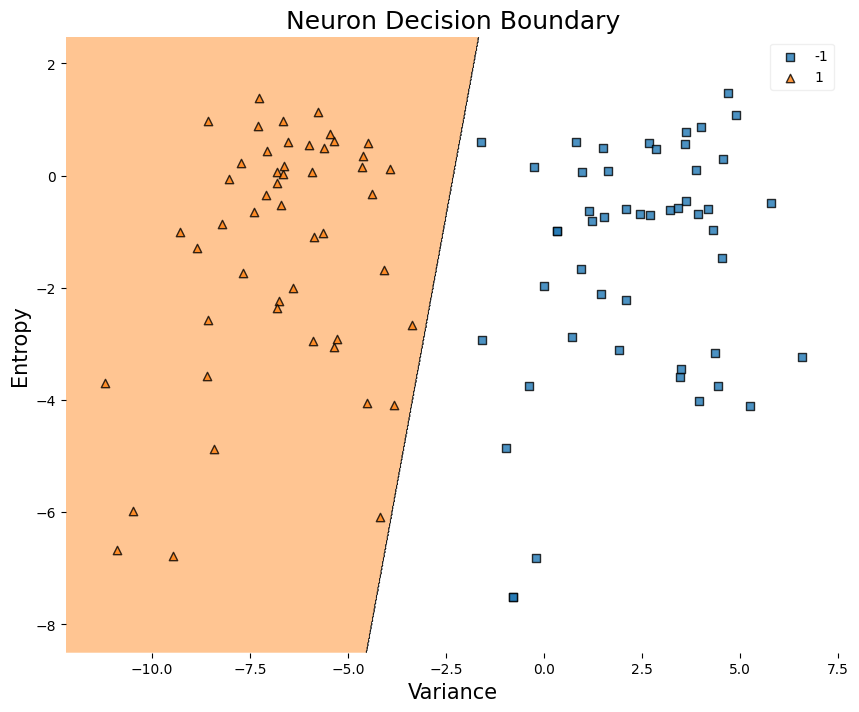

In [57]:
clf.plot_decision_boundary(X,y,"Variance","Entropy")

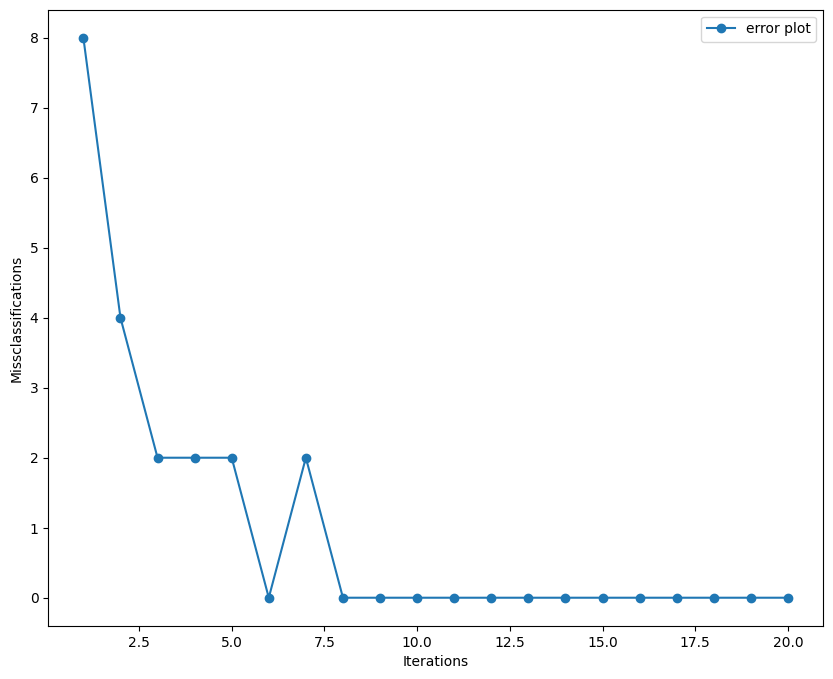

In [58]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), [i*len(y) for i in clf.errors_], 
         marker = "o",
         label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()